# 제32회 ADP 실기 대비 - 핵심만 요약한 통계와 머신러닝 파이썬 코드북

In [76]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 설정
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 설정

# Colab 한글 폰트 설정
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# plt.rc('font', family='NanumBarunGothic')

# 2장. 전처리
- 본격적인 데이터 분석에 앞서 자료를 탐색적으로 분석하고 전처리(Pre-processing)를 하는 이유는 모델을 성공적으로 학습시키기 위함이다.
- 데이터에 결측치, 이상치, 영향치가 있거나 클래스가 불균형한 경우, 모델이 데이터를 올바르게 학습하기 어렵다.
- 또한, 학습하려는 모델에 적합하게 변수를 전처리함으로써 모델의 성능을 향상시키고, 유의미한 모델을 생성할 수 있다.

## 2-1. 결측치 처리
- 데이터 결측치 처리 방법으로는 0이나 특정한 상수(Constant)로 대치하는 방법이 있고, 대푯값으로 채우는 방법, 단순확률대치법, 다른 변수들로부터 모델링을 하여 결측값을 예측하는 방법, 결측값 여부를 새로운 특징으로 추출하는 방법 등이 있다.
- 시계열 데이터의 경우, 일반적으로 보간법으로 결측치를 처리한다.
- 데이터 양에 비해 결측치가 극소수이거나 절대다수인 경우에는, 아예 결측치가 있는 데이터의 행이나 열 자체를 삭제하고 분석을 진행하기도 한다.

### 결측치 확인
- wine은 세 종류(Class)의 와인들의 특성들(Alcohol, Malicacid, Ash 등)을 측정한 데이터셋이다.
- 다음에서 보듯이 해당 데이터는 결측치가 없기 때문에 임의로 결측치가 있는 데이터 'wine_m'을 생성하였다.
- 데이터프레임에 **`isna()`**를 하면 결측치가 있는 셀은 True, 없는 셀은 False로 표시가 되는데, 여기서 **`sum()`**을 하면 True는 1, False는 0으로 계산되어 각 컬럼 별로 결측치의 합계를 확인할 수 있다.
- 한편, missingno 라이브러리를 활용하면 결측치를 시각화 할 수 있다.

In [77]:
wine = pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/2-1_wine.csv", index_col=0).filter(['Alcohol', 'Malicacid', 'Ash', 'Magnesium', 'Hue'])
wine.isna().sum()

Alcohol      0
Malicacid    0
Ash          0
Magnesium    0
Hue          0
dtype: int64

In [78]:
# 결측치가 없으므로 두 개의 컬럼 Alcohol과 Ash에 임의로 결측치를 입력
from numpy.random import randint

wine_m = wine.copy()
for col in ['Alcohol', 'Ash']:
    random_idx = randint(0, len(wine), 25)
    wine_m.loc[random_idx, col] = np.nan
    
wine_m.isna().sum()

Alcohol      25
Malicacid     0
Ash          22
Magnesium     0
Hue           0
dtype: int64

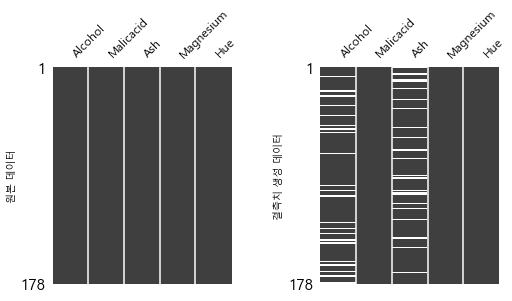

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
plt.subplots_adjust(wspace=0.5)

import missingno as msno
msno.matrix(df=wine, figsize=(5, 5), fontsize=12, ax=ax[0], sparkline=False)
ax[0].set_ylabel('원본 데이터')

msno.matrix(df=wine_m, figsize=(5, 5), fontsize=12, ax=ax[1], sparkline=False)
ax[1].set_ylabel('결측치 생성 데이터')

plt.show()

### Zero imputation & Constant imputation
- 결측값을 0이나 특정 상수로 대치하는 방법이다.
- Pandas의 데이터프레임 객체에 **`fillna(대치값)`**로 결측치를 간단하게 대치할 수 있다.
- 앞서 생성한 결측치가 있는 데이터프레임 wine_m의 앞 10개 행의 데이터를 살펴보면 다음과 같다.
- 데이터를 살펴볼 때는 wine_m 데이터 중에서도 결측치가 있는 변수인 'Alcohol'과 'Ash'의 데이터만 확인해 보았다.

In [80]:
# 대치 전: wine_m
wine_m[['Alcohol', 'Ash']].head(10)

,Alcohol,Ash
0,14.23,2.43
1,13.20,NaN
2,13.16,2.67
3,14.37,2.50
4,13.24,2.87
5,14.20,2.45
6,14.39,NaN
7,14.06,2.61
8,NaN,2.17
9,13.86,2.27


In [81]:
# 0으로 대치 후: wine_imp
wine_imp = wine_m.fillna(0)
wine_imp[['Alcohol', 'Ash']].head(10)

,Alcohol,Ash
0,14.23,2.43
1,13.20,0.00
2,13.16,2.67
3,14.37,2.50
4,13.24,2.87
5,14.20,2.45
6,14.39,0.00
7,14.06,2.61
8,0.00,2.17
9,13.86,2.27


In [82]:
# 1000으로 대치 후: wine_imp
wine_imp = wine_m.fillna(1000)
wine_imp[['Alcohol', 'Ash']].head(10)

,Alcohol,Ash
0,14.23,2.43
1,13.20,1000.00
2,13.16,2.67
3,14.37,2.50
4,13.24,2.87
5,14.20,2.45
6,14.39,1000.00
7,14.06,2.61
8,1000.00,2.17
9,13.86,2.27


### 대푯값으로 채우는 방법
- 해당 변수의 결측되지 않은 다른 값들로 구한 평균값, 중앙값, 최빈값 등의 대푯값으로 결측치를 대치하는 방법이다.
- 로그 변환 등을 통해 치우침이 적은 분포로 데이터를 변환한 후 대푯값을 구해 대치하기도 한다.

In [83]:
# 결측치를 대푯값 'mean'으로 대치한 데이터셋: wine_imp1
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # strategy = 'mean', 'median' or 'most_frequent'
wine_imp1 = imputer.fit_transform(wine_m)
wine_imp1 = pd.DataFrame(wine_imp1, columns=wine_m.columns)

Al_mean = wine_m.Alcohol.mean()
As_mean = wine_m.Ash.mean()

print(f"Alcohol mean: {Al_mean}, Ash mean: {As_mean}")
wine_imp1[['Alcohol', 'Ash']].head(10).round(2)

Alcohol mean: 12.968562091503264, Ash mean: 2.3749999999999996


,Alcohol,Ash
0,14.23,2.43
1,13.20,2.38
2,13.16,2.67
3,14.37,2.50
4,13.24,2.87
5,14.20,2.45
6,14.39,2.38
7,14.06,2.61
8,12.97,2.17
9,13.86,2.27


### 단순확률대치법(Single stochastic imputation)
- 유사한 데이터 셋에서 랜덤하게 샘플링한 값으로 대치하는 방법이다.
- Hot-deck과 Cold-deck 방법이 있다.
- Hot-deck 대치법은 현재 진행 중인 연구에서 비슷한 성향을 갖는 데이터들 중 랜덤하게 선택하는 방법이고, Cold-deck 대치법은 외부 출처 혹은 이전의 비슷한 연구에서 대체할 자료를 가져오는 것이다.
- 데이터프레임**`sample()`**로 랜덤 샘플링할 수 있다.
- 아래에서는 wine 데이터가 wine_m 데이터와 비슷한 성향을 가진 연구중인 데이터라고 가정하고 Hot-deck 대치를 진행하였다.

In [84]:
# 결측치를 Hot-deck 방법으로 대치한 데이터셋: wine_imp2
# wine 데이터가 wine_m 데이터와 비슷한 성향을 가졌다고 가정하고 wine 데이터에서 랜덤하게 데이터를 선택하여 wine_m의 결측치를 대치함
wine_imp2 = wine_m.copy()
for feat in ['Alcohol', 'Ash']:
    missing_idx = wine_imp2[wine_imp2[feat].isna()==True].index
    wine_imp2.loc[missing_idx, feat] = wine[feat].sample(len(missing_idx)).values
    
wine_imp2.isna().sum()

Alcohol      0
Malicacid    0
Ash          0
Magnesium    0
Hue          0
dtype: int64

In [85]:
wine_imp2.head(10)

,Alcohol,Malicacid,Ash,Magnesium,Hue
0,14.23,1.71,2.43,127,1.04
1,13.20,1.78,2.15,100,1.05
2,13.16,2.36,2.67,101,1.03
3,14.37,1.95,2.50,113,0.86
4,13.24,2.59,2.87,118,1.04
5,14.20,1.76,2.45,112,1.05
6,14.39,1.87,2.37,96,1.02
7,14.06,2.15,2.61,121,1.06
8,12.29,1.64,2.17,97,1.08
9,13.86,1.35,2.27,98,1.01


### 다른 변수들로 모델링을 하여 결측값을 예측하는 방법
- KNN Imputer는 대푯값 대치법보다 정확할 때가 많지만, 전체 데이터셋을 메모리에 올려야 해서 메모리가 많이 필요하고 이상치에 민감하다.
- KNN 외에도 기타 회귀 및 분류 알고리즘을 통해 결측값을 예측하는 모델을 만들어 대치에 활용할 수 있다.

In [86]:
# KNNImputer로 결측치를 대치한 데이터셋: wine_imp3
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
wine_imp3 = imputer.fit_transform(wine_m)
wine_imp3 = pd.DataFrame(wine_imp3, columns=wine_m.columns)
wine_imp3.isna().sum()

Alcohol      0
Malicacid    0
Ash          0
Magnesium    0
Hue          0
dtype: int64

### 보간법(Interpolation)
- 보간법은 주로 시계열 데이터의 결측치를 대치할 때 사용한다.
- 선형(Linear) 보간법, 다항식(Polynomial) 보간법, 스플라인(Spline) 보간법 등이 있다.
- Pandas의 데이터프레임 객체에 **`interpolate()`**으로 파라미터에 보간법 종류를 입력함으로써 다양한 방법으로 데이터의 결측치를 대치할 수 있다.
- 'linear'는 선형보간, 'zero', 'slinear', 'quadratic', 'cubic'은 0차, 1차, 2차, 3차의 스플라인 보간을 의미한다.
- 'spline'과 'polynomial'은 order 파라미터에 차수를 지정하여 사용한다.
- 맨 앞의 결측치는 보간이 되지 않기 때문에 단순하게 그 다음 값으로 채우기도 한다.

In [87]:
# 선형보간법으로 결측치를 대치한 데이터셋: wine_imp4
wine_imp4 = wine_m.interpolate(method='linear')
wine_imp4.isna().sum()

Alcohol      0
Malicacid    0
Ash          0
Magnesium    0
Hue          0
dtype: int64

### 실제값과 대치값의 비교
- 앞서 여러 가지 방법으로 구한 대치값들이 실제값과 얼마나 차이가 나는지 MAE와 MSE를 구하여 아래와 같이 비교해 보았다.

In [88]:
# Alcohol feature 기준으로 결측치를 전처리한 결과를 비교
feature = 'Alcohol'
report = pd.DataFrame({
    '실제값'    : wine[feature],
    'mean 대치' : wine_imp1[feature],
    'Hot-deck'  : wine_imp2[feature],
    'KNN 대치'  : wine_imp3[feature],
    '선형보간'  : wine_imp4[feature]    
})

# 실제값과 대치한 값 사이의 차이를 비교
score_report = pd.DataFrame(index=['MAE', 'MSE'])

from sklearn.metrics import mean_absolute_error, mean_squared_error
for col in report.columns:
    mae = mean_absolute_error(report['실제값'], report[col])
    mse = mean_squared_error(report['실제값'], report[col])
    score_report.loc['MAE', col] = mae
    score_report.loc['MSE', col] = mse

score_report # 실제값-선형보간대치값의 차이가 가장 작게 나타남

,실제값,mean 대치,Hot-deck,KNN 대치,선형보간
MAE,0.0,0.094462,0.152528,0.105187,0.057949
MSE,0.0,0.085679,0.236129,0.141728,0.037693


In [89]:
# Ash feature 기준으로 결측치를 전처리한 결과를 비교
feature = 'Ash'
report = pd.DataFrame({
    '실제값'    : wine[feature],
    'mean 대치' : wine_imp1[feature],
    'Hot-deck'  : wine_imp2[feature],
    'KNN 대치'  : wine_imp3[feature],
    '선형보간'  : wine_imp4[feature]    
})

# 실제값과 대치한 값 사이의 차이를 비교
score_report = pd.DataFrame(index=['MAE', 'MSE'])

from sklearn.metrics import mean_absolute_error, mean_squared_error
for col in report.columns:
    mae = mean_absolute_error(report['실제값'], report[col])
    mse = mean_squared_error(report['실제값'], report[col])
    score_report.loc['MAE', col] = mae
    score_report.loc['MSE', col] = mse

score_report # 실제값-mean 대치값의 차이가 가장 작게 나타남

,실제값,mean 대치,Hot-deck,KNN 대치,선형보간
MAE,0.0,0.029270,0.030674,0.024401,0.030393
MSE,0.0,0.010497,0.013660,0.007905,0.011892


## 2-2. 이상치 처리
- 특정 데이터가 이상치(Outlier)인지 여부를 진단할 때 다음과 같은 기준을 사용할 수 있다.
- 아래의 정상적인 데이터의 범위를 벗어난 데이터들을 이상치로 본다.
    1. ESD(Extreme studentized deviation): 평균 - 3 * 표준편차 < normal data < 평균 + 3 * 표준편차
    2. 기하평균 - 2.5 * 표준편차 < normal data < 기하평균 + 2.5 * 표준편차
    3. **`Q1 - 1.5 * IQR < normal data < Q3 + 1.5 * IQR`**
    4. 군집분석을 통한 이상치 진단: scikit-learn의 DBSCAN 군집분석을 통해 -1로 분류되는 값을 이상치로 진단

- 이상치는 변수들 사이의 보편적인 관계를 왜곡시키기 때문에 잘못된 학습 결과를 얻게할 수 있다.
- 따라서, 적절한 이상치 처리를 한 후 데이터 분석을 실시해야 한다.
- 다만, 이상치 탐색이 목적이거나 연구상 이상치를 포함시키는 것이 더 의미가 있다고 판단될 경우에는 이상치를 처리하지 않고 분석을 진행하기도 한다.
- 이상치를 처리하는 방법으로는 절단, 조정, 클리핑 등이 있다.

#### (예1) IQR 기법을 활용한 Wine 데이터 Malicacid 이상치 처리

In [90]:
wine = pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/2-1_wine.csv", index_col=0).filter(['Alchol', 'Malicacid', 'Ash', 'Magnesium', "Hue'"])
wine.head(3)

,Malicacid,Ash,Magnesium
0,1.71,2.43,127
1,1.78,2.14,100
2,2.36,2.67,101


In [91]:
q1, q3 = np.quantile(wine.Malicacid, 0.25), np.quantile(wine.Malicacid, 0.75)
iqr = q3 - q1

upper_bound = q3 + iqr * 1.5
lower_bound = q1 - iqr * 1.5

# upper_bound 보다 크고 lower_bound 보다 작은 데이터의 인덱스를 찾음
outlier_idx = wine.loc[
    (wine.Malicacid >= upper_bound) |
    (wine.Malicacid <= lower_bound)
].index

print(f"이상치(Outlier) 인덱스: {outlier_idx.tolist()}")

이상치(Outlier) 인덱스: [123, 137, 173]


### 절단 (Trim or Truncation)
- 경계값 너머의 이상치들을 제거하는 방법이다.
- 앞서 찾은 이상치들의 인덱스를 아래와 같이 데이터에서 **`drop()`** 함으로써 절단할 수 있다.
- wine 데이터의 Malicacid의 이상치를 처리한 결과, 다음과 같이 3개의 이상치가 발견되어 절단 처리되었다.
- 다만, 이상치를 절단한 후에 데이터의 분포가 달라짐에 따라, 이상치가 아니었던 데이터가 새로운 이상치로 진단되기도 한다.
- 이를 추가적으로 이상치 처리할 지 여부는 분석가가 상황에 맞게 결정하면 된다.

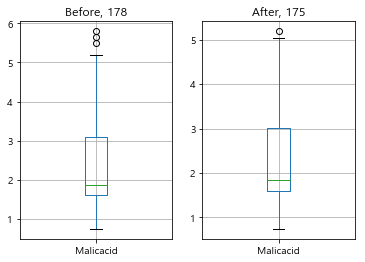

In [92]:
# 절단
wine_trim = wine[['Malicacid']].drop(outlier_idx, axis=0)

fig, axes = plt.subplots(1, 2)
for data, ax, title in zip([wine[['Malicacid']], wine_trim], axes, ['Before', 'After']):
    data.boxplot(ax=ax)
    ax.set_title(f"{title}, {len(data)}")
    
plt.show()

### 조정 (Winsorizing)
- 이상치를 이상치의 상한과 하한선 값으로 보정하는 방법이다.
- 앞서 사용한 이상치 진단 기준에 의해 정해진 상한과 하한선 값으로 아래와 같이 이상치를 조정하였다.
- 그 결과, 절단과는 달리 전체 데이터의 소실이 없기 때문에 이상치 조정 전/후의 데이터 크기가 동일하며, 이상치는 사라진 것으로 나타난다.

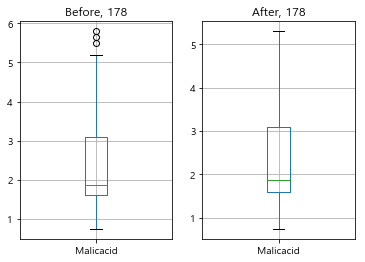

In [93]:
wine_winsor = wine[['Malicacid']].clip(lower_bound, upper_bound)

fig, axes = plt.subplots(1, 2)
for data, ax, title in zip([wine[['Malicacid']], wine_winsor], axes, ['Before', 'After']):
    data.boxplot(ax=ax)
    ax.set_title(f"{title}, {len(data)}")
    
plt.show()

### 클리핑 (Clipping)
- 이상치의 상한값과 하한값을 특정 값으로 지정해서 해당 범위를 벗어나는 값을 상한값과 하한값으로 조정하는 방법이다.
- 이상치 경계값에 대한 확실한 정보를 가지고 있거나, 데이터릍 특정 경계값으로 제한하고 싶을 때 사용한다.
- 아래는 상한값을 5, 하한값을 1로 지정하여 클리핑한 결과이다.

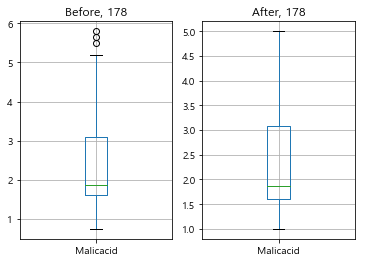

In [94]:
wine_clip = wine[['Malicacid']].clip(1, 5)

# 전/후 시각화
fig, axes = plt.subplots(1, 2)
for data, ax, title in zip([wine[['Malicacid']], wine_clip], axes, ['Before', 'After']):
    data.boxplot(ax=ax)
    ax.set_title(f"{title}, {len(data)}")
    
plt.show()

## 2-3. 클래스 불균형 처리
- 클래스 불균형이란, 전체 데이터에서 타겟변수의 클래스 별 비율이 유사하지 않고 불균형한 상태를 뜻한다.
- 예를 들어, 0과 1의 클래스로 구성된 데이터 100개 중 10개가 1이고 90개가 0인 경우이다.
- 실제로 현실 세계의 데이터들은 이처럼 클래스가 불균형한 경향이 있다.
- 이 때문에 데이터 수가 적은 클래스의 분포를 적절히 학습하지 못하고 다수 클래스에 과대적합 되어 대부분의 데이터를 다수 클래스로 분류하는 문제가 발생하기도 한다.
- 이러한 문제를 해결하기 위해 오버샘플링 혹은 언더샘플링으로 클래스 불균형을 조정하는 방법이 있다.
- 클래스 불균형 데이터는 소수 클래스의 데이터 수가 부족한 경우가 많기 때문에 언더샘플링 보다는 주로 오버샘플링을 실시한다.
- 오버샘플링 및 언더샘플링을 위해 imbalanced-learn 라이브러리의 아래와 같은 함수들을 사용한다.
    - 오버샘플링: RandomOverSampler, SMOTE, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE, ADASYN 등
    - 언더샘플링: RandomUnderSampler, ClusterCentroids, CondensedNearestNeighbour, AllKNN등

### 클래스 불균형 데이터 생성하기
- scikit-learn에서 제공하는 데이터셋 중 'breast cancer' 데이터를 불러와서 클래스 불균형 데이터를 생성하고, 각종 방법으로 오버샘플링 해보고자 한다.
- 'breast cancer' 데이터는 환자들의 특성 데이터로서, 유방암에 걸린 환자를 1, 유방암이 아닌 환자를 0으로 분류한 데이터이다.
- 전체 특성이 너무 많으므로 편의상 그 중 일부 특성만 골라 사용하기로 한다.
- 원본 데이터는 클래스 0과 1의 비율이 비교적 균형을 이루고 있는데, 이를 클래스 0이 소수인 데이터가 되도록 클래스 별로 불균형하게 랜덤 샘플링하여 다음과 같이 연결하였다.

In [95]:
from sklearn.datasets import load_breast_cancer
from collections import Counter

# sklearn의 데이터 불러오기
data = load_breast_cancer()
df = pd.DataFrame(np.c_[data['data'], data['target']], columns=list(data.feature_names) + ['target'])

# 3개의 feature와 target을 추출
df = df.filter(['mean radius', 'mean texture', 'mean area', 'target'])
df.head(3)

,mean radius,mean texture,mean area,target
0,17.99,10.38,1001.0,0.0
1,20.57,17.77,1326.0,0.0
2,19.69,21.25,1203.0,0.0


In [96]:
print(f"Original data의 class 분포: {Counter(df['target'])}")

Original data의 class 분포: Counter({1.0: 357, 0.0: 212})


In [97]:
# 클래스 불균형한 imb_df 생성
df1 = df[df['target']==0].sample(50)
df2 = df[df['target']==1].sample(250)

imb_df = pd.concat([df1, df2]).reset_index(drop=True)
print(f"Imbalanced data의 class 분포: {Counter(imb_df['target'])}")

Imbalanced data의 class 분포: Counter({1.0: 250, 0.0: 50})


### 랜덤 오버샘플링
- 기존에 존재하는 소수의 클래스를 단순 복제하여 클래스가 불균형 하지 않도록 비율을 맞춰주는 방법이다.
- 분포의 변화는 없으나 소수 클래스인 데이터가 많아지면서 해당 클래스에 대한 가중치가 높아지게 된다.
- 한편, 단순히 동일한 데이터의 개수가 늘어난 것이기 때문에 과적합 될 수 있다는 단점이 있다.
- 다음과 같이 RandomOverSampler를 통해 랜덤 오버샘플링 된 데이터 포인트들은 산점도에 겹쳐져서 찍히기 때문에 원본보다 색상이 진하게 나타난다.

Imbalanced data의 Class 분포: Counter({1.0: 250, 0.0: 50})
Oversampled data의 Class 분포: Counter({0.0: 250, 1.0: 250})


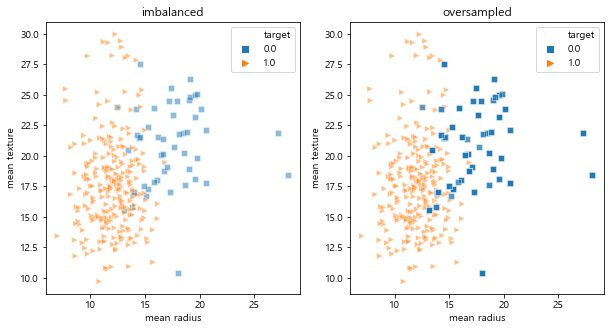

In [98]:
from imblearn.over_sampling import RandomOverSampler

features = imb_df.drop('target', axis=1)
target = imb_df['target']

os = RandomOverSampler(random_state=0)
bal_features, bal_target = os.fit_resample(features, target)

print(f"Imbalanced data의 Class 분포: {Counter(target)}")
print(f"Oversampled data의 Class 분포: {Counter(bal_target)}")

over_df1 = pd.DataFrame(np.c_[bal_features, bal_target], columns=imb_df.columns)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title('imbalanced')
sns.scatterplot(x='mean radius', y='mean texture', hue='target', data=imb_df, ax=ax[0], alpha=0.5, style='target', markers=['s', '>'])

ax[1].set_title('oversampled')
sns.scatterplot(x='mean radius', y='mean texture', hue='target', data=over_df1, ax=ax[1], alpha=0.5, style='target', markers=['s', '>'])
plt.show()

### SMOTE(Synthetic minority oversampling technique)
- 임의의 소수 클래스 데이터로부터 인근 소수 클래스 사이에 새로운 데이터를 생성하는 방법이다.
- 임의의 소수 클래스에 해당하는 x를 잡고 그로부터 가장 가까운 k개의 이웃을 찾은 다음, 이 k개의 이웃과 x 사이에 임의의 새로운 데이터 x'를 생성한다.

Imbalanced data의 Class 분포: Counter({1.0: 250, 0.0: 50})
Oversampled data의 Class 분포: Counter({0.0: 250, 1.0: 250})


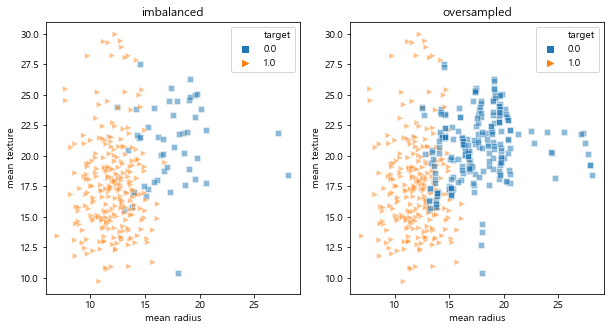

In [99]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0, k_neighbors=3)
bal_features, bal_target = os.fit_resample(features, target)

print(f"Imbalanced data의 Class 분포: {Counter(target)}")
print(f"Oversampled data의 Class 분포: {Counter(bal_target)}")

over_df2 = pd.DataFrame(np.c_[bal_features, bal_target], columns=imb_df.columns)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title('imbalanced')
sns.scatterplot(x='mean radius', y='mean texture', hue='target', data=imb_df, ax=ax[0], alpha=0.5, style='target', markers=['s', '>'])

ax[1].set_title('oversampled')
sns.scatterplot(x='mean radius', y='mean texture', hue='target', data=over_df2, ax=ax[1], alpha=0.5, style='target', markers=['s', '>'])
plt.show()

### Borderline SMOTE
- 다수의 클래스와 소수의 클래스를 구분하는 선을 그을 때 서로 인접해 있는 경계선에 있는 소수 클래스의 데이터에 대해서 SMOTE를 적용하는 방법이다.
- 먼저, 임의의 소수 클래스 데이터 x와 근접하는 데이터들의 클래스를 살펴보고 여기에 소수와 다수 클래스가 모두 존재하면 이 데이터 x를 경계 데이터로 분류한다.
- 그렇지 않은 경우의 소수 클래스 데이터 x는 고려하지 않는다.
- Borderline SMOTE는 이러한 경계 데이터만 사용하여 SMOTE를 적용하고 새로운 데이터들을 생성한다.

Imbalanced data의 Class 분포: Counter({1.0: 250, 0.0: 50})
Oversampled data의 Class 분포: Counter({0.0: 250, 1.0: 250})


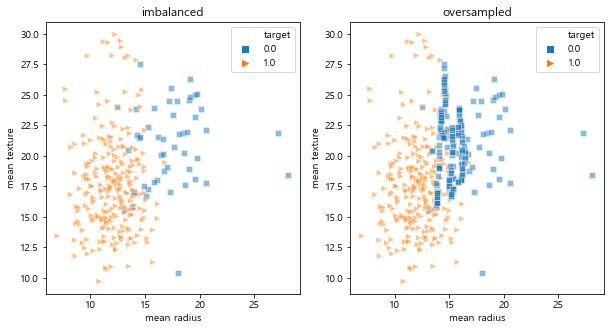

In [100]:
from imblearn.over_sampling import BorderlineSMOTE

os = BorderlineSMOTE(random_state=0, k_neighbors=3)
bal_features, bal_target = os.fit_resample(features, target)

print(f"Imbalanced data의 Class 분포: {Counter(target)}")
print(f"Oversampled data의 Class 분포: {Counter(bal_target)}")

over_df3 = pd.DataFrame(np.c_[bal_features, bal_target], columns=imb_df.columns)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title('imbalanced')
sns.scatterplot(x='mean radius', y='mean texture', hue='target', data=imb_df, ax=ax[0], alpha=0.5, style='target', markers=['s', '>'])

ax[1].set_title('oversampled')
sns.scatterplot(x='mean radius', y='mean texture', hue='target', data=over_df3, ax=ax[1], alpha=0.5, style='target', markers=['s', '>'])
plt.show()

### K-means SMOTE
- K-means 클러스터링 알고리즘을 사용하여 전체 데이터를 클러스터링하고, 소수 클래스 샘플이 적게 포함된 군집에 소수 클래스 샘플을 추가하는 방법이다.

Imbalanced data의 Class 분포: Counter({1.0: 250, 0.0: 50})
Oversampled data의 Class 분포: Counter({0.0: 251, 1.0: 250})


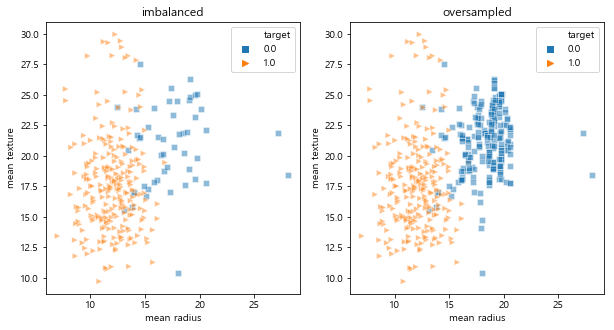

In [101]:
from imblearn.over_sampling import KMeansSMOTE

os = KMeansSMOTE(random_state=0, k_neighbors=3)
bal_features, bal_target = os.fit_resample(features, target)

print(f"Imbalanced data의 Class 분포: {Counter(target)}")
print(f"Oversampled data의 Class 분포: {Counter(bal_target)}")

over_df4 = pd.DataFrame(np.c_[bal_features, bal_target], columns=imb_df.columns)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title('imbalanced')
sns.scatterplot(x='mean radius', y='mean texture', hue='target', data=imb_df, ax=ax[0], alpha=0.5, style='target', markers=['s', '>'])

ax[1].set_title('oversampled')
sns.scatterplot(x='mean radius', y='mean texture', hue='target', data=over_df4, ax=ax[1], alpha=0.5, style='target', markers=['s', '>'])
plt.show()

### SVM SMOTE
- SVM(Support vector machines) 알고리즘으로 데이터를 학습함으로써 생성되는 support vector를 활용한다.
- 소수 클래스인 support vector 데이터들을 경계 데이터로 삼고 SMOTE를 적용하는 방법이다.

Imbalanced data의 Class 분포: Counter({1.0: 250, 0.0: 50})
Oversampled data의 Class 분포: Counter({0.0: 250, 1.0: 250})


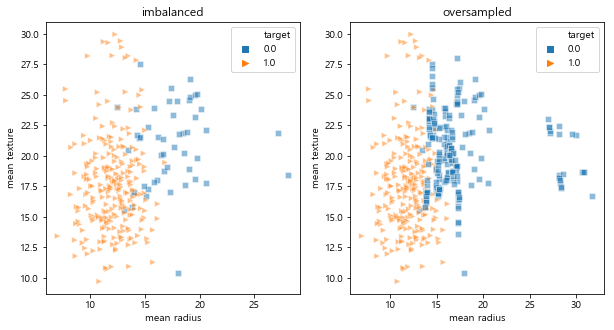

In [102]:
from imblearn.over_sampling import SVMSMOTE

os = SVMSMOTE(random_state=0, k_neighbors=3)
bal_features, bal_target = os.fit_resample(features, target)

print(f"Imbalanced data의 Class 분포: {Counter(target)}")
print(f"Oversampled data의 Class 분포: {Counter(bal_target)}")

over_df5 = pd.DataFrame(np.c_[bal_features, bal_target], columns=imb_df.columns)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title('imbalanced')
sns.scatterplot(x='mean radius', y='mean texture', hue='target', data=imb_df, ax=ax[0], alpha=0.5, style='target', markers=['s', '>'])

ax[1].set_title('oversampled')
sns.scatterplot(x='mean radius', y='mean texture', hue='target', data=over_df5, ax=ax[1], alpha=0.5, style='target', markers=['s', '>'])
plt.show()

### ADASYN(Adaptive synthetic sampling)
- 가중치를 통해 SMOTE를 적용시키는 방식이다.
- 인접한 데이터의 소수 클래스와 다수 클래스의 비율에 따라 생성되는 샘플의 개수가 정해진다.
- 생성되는 샘플의 개수는 소수 클래스의 밀도에 반비례한다.

Imbalanced data의 Class 분포: Counter({1.0: 250, 0.0: 50})
Oversampled data의 Class 분포: Counter({0.0: 253, 1.0: 250})


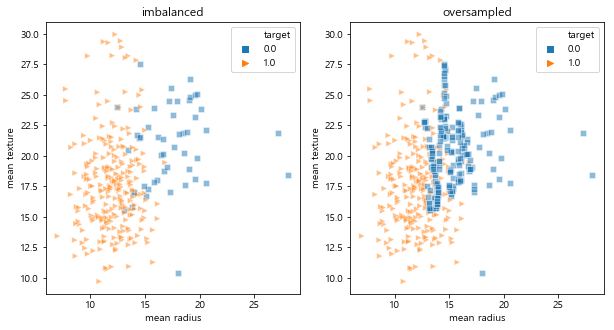

In [103]:
from imblearn.over_sampling import ADASYN

os = ADASYN(random_state=0, n_neighbors=3)
bal_features, bal_target = os.fit_resample(features, target)

print(f"Imbalanced data의 Class 분포: {Counter(target)}")
print(f"Oversampled data의 Class 분포: {Counter(bal_target)}")

over_df6 = pd.DataFrame(np.c_[bal_features, bal_target], columns=imb_df.columns)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title('imbalanced')
sns.scatterplot(x='mean radius', y='mean texture', hue='target', data=imb_df, ax=ax[0], alpha=0.5, style='target', markers=['s', '>'])

ax[1].set_title('oversampled')
sns.scatterplot(x='mean radius', y='mean texture', hue='target', data=over_df6, ax=ax[1], alpha=0.5, style='target', markers=['s', '>'])
plt.show()

### 오버샘플링된 데이터로 분류 학습 및 결과 비교
- 불균형 데이터와 각종 방법으로 오버샘플링된 데이터들로 각각 로지스틱 회귀 모델링을 하고, 정확도 및 F1-score를 계산하였다.
- 그 결과, Test F1-score를 기준으로 K-means SMOTE 데이터로 학습한 모델이 가장 높은 분류 성능을 나타냈다.
- 이는 불균형 데이터로 학습한 모델보다 개선된 성능을 나타낸 것이다.
- 반면, Borderline SMOTE 데이터로 학습한 모델은 가장 낮은 분류 성능을 나타냈다.

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

data = [imb_df, over_df1, over_df2, over_df3, over_df4, over_df5, over_df6]
data_title = ['no oversampling', 'RandomOverSampler', 'SMOTE', 'BorderlineSMOTE', 'KMeansSMOTE', 'SVMSMOTE', 'ADASYN']

scores = pd.DataFrame(index=['Train acc', 'Test acc', 'Train F1', 'Test F1'], columns=data_title)

for df, title in zip(data, data_title):
    features = df.drop('target', axis=1)
    target = df['target']
    
    X_train, X_test, y_train, y_test = train_test_split(features, target)
    
    lr = LogisticRegression(max_iter=300)
    lr.fit(X_train, y_train)
    
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    
    scores.loc['Train acc', title] = accuracy_score(y_train, pred_train)
    scores.loc['Test acc', title] = accuracy_score(y_test, pred_test)
    scores.loc['Train F1', title] = f1_score(y_train, pred_train)
    scores.loc['Test F1', title] = f1_score(y_test, pred_test)
    
scores

,no oversampling,RandomOverSampler,SMOTE,BorderlineSMOTE,KMeansSMOTE,SVMSMOTE,ADASYN
Train acc,0.96,0.866667,0.877333,0.864,0.952,0.898667,0.798408
Test acc,0.84,0.912,0.896,0.888,0.97619,0.88,0.825397
Train F1,0.976127,0.870466,0.878947,0.861035,0.952128,0.893258,0.796791
Test F1,0.90625,0.904348,0.896,0.890625,0.976744,0.890511,0.830769


## 2-4. 변수변환(Feature scaling)
- 특성(Feature)의 척도(Scale)를 바꾸는 것을 의미하며, 일반적으로 각 특성에 대해 개별적으로 수행한다.
- 회귀분석 모델의 경우, 특성의 관측치의 범위가 크거나 특성들의 척도가 크게 상이하면 회귀계수가 왜곡되기 쉽다.
- 신경망 모델의 경우에도, 특성들 간의 값의 척도가 크게 다르면 학습이 잘 진행되지 않는다.
- 거리 기반 모델들도 마찬가지이다. 이처럼 사용하려는 모델이 특성의 척도에 민감하다면 데이터 학습 전에 반드시 변수변환을 진행해야 한다.
- 반면, 트리 기반 모델들은 특성의 척도에서 자유롭기 때문에 변수변환이 필수적이지 않다.

### 2-4-1. 수치형 변수 변환
- 크게 선형변환(표준화, 최소-최대 스케일링, Robust scaling, Quantile scaling 등)과 비선형변환(로그 변환, Box-cox, Yeo-Johnson 등)으로 나눌 수 있으며 이외에도 구간분할(Binning), 순위로 변환 등이 있다.
- 수치형 변수변환 예제를 위해 다음과 같이 'diabetes' 데이터셋을 불러왔다.
- 'diabetes'는 환자의 특성들과 당뇨병 여부를 포함하는 분류 데이터이다. 여러 특성들 중에서 편의상 4개의 특성만 사용하기로 한다.

In [105]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/2-4_diabetes.csv")

X = diabetes.filter(['Pregnancies', 'BloodPressure', 'BMI', 'Age']) # 4개 특성
y = diabetes['Outcome']

print("특성:\n", X.head(1))
print("타겟:\n", y.head(1))

특성:
    Pregnancies  BloodPressure   BMI  Age
0            6             72  33.6   50
타겟:
 0    1
Name: Outcome, dtype: int64


#### 표준화(Standardization)
- 각 특성별로 표준점수(Z-score)를 구하는 변수변환 방법으로서 (각 데이터 포인트 - 데이터의 평균) / 데이터의 표준편차로 계산한다.
- 이를 통해 각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 한다.
- 표준점수인 z는 원수치인 x가 평균에서 얼마나 떨어져 있는지를 나타낸다.
- z값이 음수이면 평균 이하, 양수이면 평균 이상이다.
- 그러나 이 방법은 특성의 최솟값과 최댓값의 크기를 제한하지는 않는다.
- 다음의 예제 코드를 통해 표준화 스케일링의 결과를 확인할 수 있다.
- 스케일링 전, 특성들의 데이터는 저마다 다른 평균과 범위를 가지고 분포되어 있다.
- 표준화 스케일링을 통해 각 특성들은 0에 가까운 평균을 가지게 되었으며, 대등하게 비교할 수 있는 스케일을 갖게 되었다.

In [106]:
print("[Before] feature 별 데이터 분포 확인:")
print(X.describe().loc[['mean', 'std', 'max', 'min'], :], '\n')

# sklearn의 StandardScaler로 feature scaling
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss_X = ss.fit_transform(X)
ss_X = pd.DataFrame(ss_X, columns=X.columns)

print("[After] feature 별 데이터 분포 확인:")
print(ss_X.describe().loc[['mean', 'std', 'max', 'min'], :])

[Before] feature 별 데이터 분포 확인:
      Pregnancies  BloodPressure        BMI        Age
mean     3.845052      69.105469  31.992578  33.240885
std      3.369578      19.355807   7.884160  11.760232
max     17.000000     122.000000  67.100000  81.000000
min      0.000000       0.000000   0.000000  21.000000 

[After] feature 별 데이터 분포 확인:
       Pregnancies  BloodPressure           BMI           Age
mean  2.544261e-17  -1.327244e-17  2.295979e-16  1.857600e-16
std   1.000652e+00   1.000652e+00  1.000652e+00  1.000652e+00
max   3.906578e+00   2.734528e+00  4.455807e+00  4.063716e+00
min  -1.141852e+00  -3.572597e+00 -4.060474e+00 -1.041549e+00


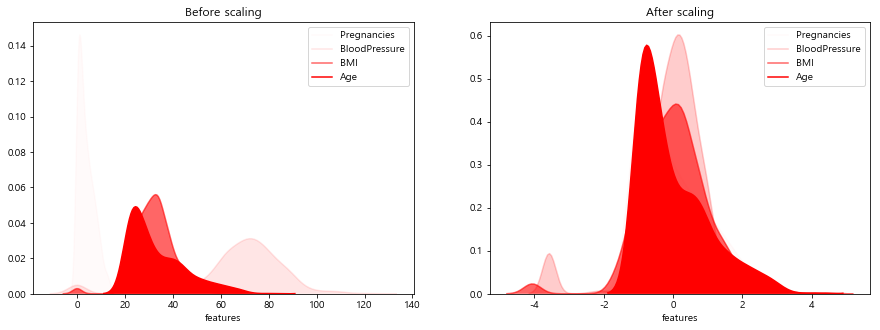

In [107]:
# scaling 전후 데이터 분포 비교 시각화
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for col, a in zip(X.columns, [0.02, 0.1, 0.6, 1]):
    sns.kdeplot(X[col], alpha=a, legend=True, ax=ax[0], shade=True, color='r')

ax[0].legend(X.columns)
ax[0].set_xlabel('features')
ax[0].set_title('Before scaling')

for col, a in zip(ss_X.columns, [0.02, 0.2, 0.6, 1]):
    sns.kdeplot(ss_X[col], alpha=a, legend=True, ax=ax[1], shade=True, color='r')
    
ax[1].legend(ss_X.columns)
ax[1].set_xlabel('features')
ax[1].set_title('After scaling')

plt.show()

#### 최소-최대 스케일링(Min-Max scaling)
- 모든 특성이 정확하게 0과 1 사이에 위치하도록 데이터를 변경하는 것이다.
- (데이터값 - 최솟값) / (최댓값 - 최솟값)으로 계산한다.
- 이미지 데이터의 픽셀값과 같이 처음부터 0~255로 범위가 정해진 변수는 최소-최대 스케일링을 이용하는게 자연스러울 수 있다.
- 반면, 변환 후의 평균이 정확히 0이 되지 않고, 이상치의 악영향을 받기 쉽다는 단점이 있어서 이 방법보다는 표준화 방법이 더 자주 쓰인다.

In [108]:
print("[Before] feature 별 데이터 분포 확인:")
print(X.describe().loc[['mean', 'std', 'max', 'min'], :], '\n')

# sklearn의 MinMaxScaler feature scaling
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
mm_X = mm.fit_transform(X)
mm_X = pd.DataFrame(mm_X, columns=X.columns)

print("[After] feature 별 데이터 분포 확인:")
print(mm_X.describe().loc[['mean', 'std', 'max', 'min'], :])

[Before] feature 별 데이터 분포 확인:
      Pregnancies  BloodPressure        BMI        Age
mean     3.845052      69.105469  31.992578  33.240885
std      3.369578      19.355807   7.884160  11.760232
max     17.000000     122.000000  67.100000  81.000000
min      0.000000       0.000000   0.000000  21.000000 

[After] feature 별 데이터 분포 확인:
      Pregnancies  BloodPressure       BMI       Age
mean      0.22618       0.566438  0.476790  0.204015
std       0.19821       0.158654  0.117499  0.196004
max       1.00000       1.000000  1.000000  1.000000
min       0.00000       0.000000  0.000000  0.000000


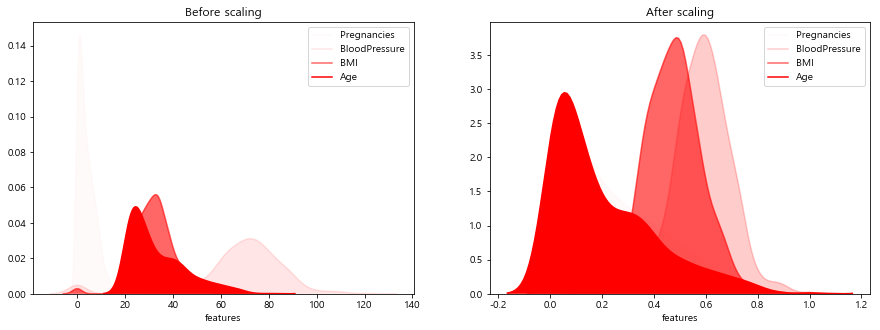

In [109]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for col, a in zip(X.columns, [0.02, 0.1, 0.6, 1]):
    sns.kdeplot(X[col], alpha=a, legend=True, ax=ax[0], shade=True, color='r')

ax[0].legend(X.columns)
ax[0].set_xlabel('features')
ax[0].set_title('Before scaling')

for col, a in zip(mm_X.columns, [0.02, 0.2, 0.6, 1]):
    sns.kdeplot(mm_X[col], alpha=a, legend=True, ax=ax[1], shade=True, color='r')
    
ax[1].legend(mm_X.columns)
ax[1].set_xlabel('features')
ax[1].set_title('After scaling')

plt.show()

#### Robust scaling
- 특성들이 같은 스케일을 갖게 된다는 통계적 측면에서는 표준화 스케일링과 비슷하지만 평균과 분산 대신 중앙값과 사분위수를 사용한다는 점에서 차이가 있다.
- 이 덕분에 Robust scaling은 이상치의 영향을 받지 않는다.
- (데이터값 - 중앙값) / (3사분위수 - 1사분위수)로 계산한다.

In [110]:
print("[Before] feature 별 데이터 분포 확인:")
print(X.describe().loc[['mean', 'std', 'max', 'min'], :], '\n')

# sklearn의 RobustScaler feature scaling
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
rs_X = rs.fit_transform(X)
rs_X = pd.DataFrame(rs_X, columns=X.columns)

print("[After] feature 별 데이터 분포 확인:")
print(rs_X.describe().loc[['mean', 'std', 'max', 'min'], :])

[Before] feature 별 데이터 분포 확인:
      Pregnancies  BloodPressure        BMI        Age
mean     3.845052      69.105469  31.992578  33.240885
std      3.369578      19.355807   7.884160  11.760232
max     17.000000     122.000000  67.100000  81.000000
min      0.000000       0.000000   0.000000  21.000000 

[After] feature 별 데이터 분포 확인:
      Pregnancies  BloodPressure       BMI       Age
mean     0.169010      -0.160807 -0.000798  0.249464
std      0.673916       1.075323  0.847759  0.691778
max      2.800000       2.777778  3.774194  3.058824
min     -0.600000      -4.000000 -3.440860 -0.470588


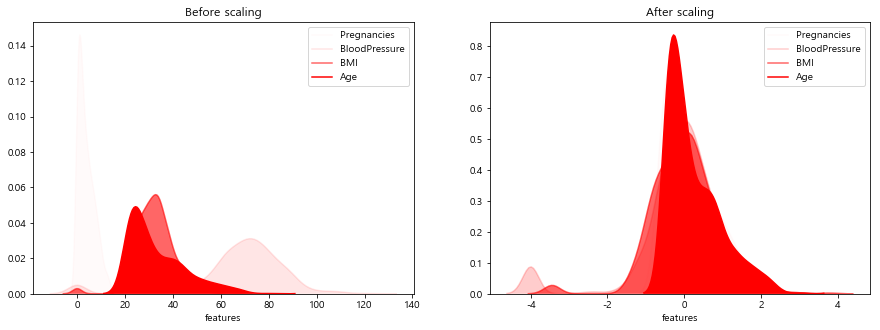

In [111]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for col, a in zip(X.columns, [0.02, 0.1, 0.6, 1]):
    sns.kdeplot(X[col], alpha=a, legend=True, ax=ax[0], shade=True, color='r')

ax[0].legend(X.columns)
ax[0].set_xlabel('features')
ax[0].set_title('Before scaling')

for col, a in zip(rs_X.columns, [0.02, 0.2, 0.6, 1]):
    sns.kdeplot(rs_X[col], alpha=a, legend=True, ax=ax[1], shade=True, color='r')
    
ax[1].legend(rs_X.columns)
ax[1].set_xlabel('features')
ax[1].set_title('After scaling')

plt.show()

#### Quantile scaling
- 분위수를 사용하여 스케일링하는 방법이다.
- scikit-learn에서 제공하는 QuantileTransformer의 파라미터 output_distribution을 'uniform' 혹은 'normal'로 설정함으로써 균등 분포 혹은 정규 분포에 가깝게 데이터를 변환할 수 있다.
- QuantileTransformer의 균등 분포 방법은 데이터의 1000개의 분위를 사용하여 분포를 재배치하는 것이다.
    - 이 방법은 Robust scaling과 마찬가지로 이상치에 민감하지 않으며 전체 데이터를 0과 1 사이로 압축한다.
    - 몇 개의 분위를 사용할지는 n_quantiles 매개변수에서 설정할 수 있으며 기본값은 1000이다.
    - 기본값보다 작은 크기의 데이터가 입력될 경우, 데이터의 개수대로 n_quantiles의 값이 설정된다.
- QuantileTransformer의 정규 분포 방법은 Rank Gauss 방법으로서 수치형 변수를 순위로 변환한 뒤 순서를 유지한 채 정규분포가 되도록 변환하는 방법이다. 전체 데이터를 -5와 5 사이로 압축한다.

In [112]:
print("[Before] feature 별 데이터 분포 확인:")
print(X.describe().loc[['mean', 'std', 'max', 'min'], :], '\n')

# sklearn의 QuantileTransformer feature scaling
from sklearn.preprocessing import QuantileTransformer

qtu = QuantileTransformer(output_distribution='uniform', n_quantiles=len(X))
qtu_X = qtu.fit_transform(X)
qtu_X = pd.DataFrame(qtu_X, columns=X.columns)

print("[After] feature 별 데이터 분포 확인:")
print(qtu_X.describe().loc[['mean', 'std', 'max', 'min'], :])

[Before] feature 별 데이터 분포 확인:
      Pregnancies  BloodPressure        BMI        Age
mean     3.845052      69.105469  31.992578  33.240885
std      3.369578      19.355807   7.884160  11.760232
max     17.000000     122.000000  67.100000  81.000000
min      0.000000       0.000000   0.000000  21.000000 

[After] feature 별 데이터 분포 확인:
      Pregnancies  BloodPressure       BMI       Age
mean     0.489773       0.499110  0.499972  0.496769
std      0.303331       0.290718  0.289391  0.294365
max      1.000000       1.000000  1.000000  1.000000
min      0.000000       0.000000  0.000000  0.000000


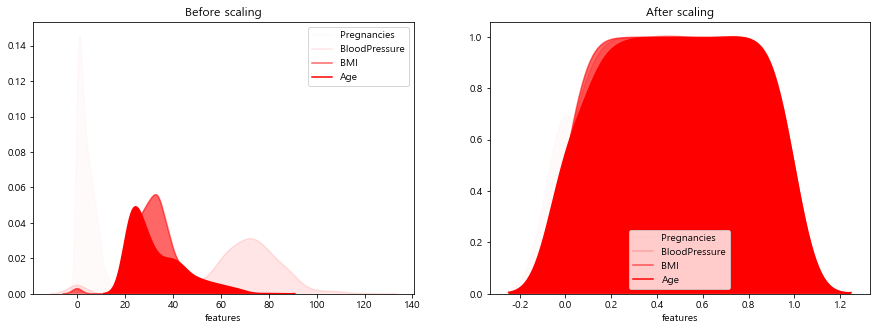

In [113]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for col, a in zip(X.columns, [0.02, 0.1, 0.6, 1]):
    sns.kdeplot(X[col], alpha=a, legend=True, ax=ax[0], shade=True, color='r')

ax[0].legend(X.columns)
ax[0].set_xlabel('features')
ax[0].set_title('Before scaling')

for col, a in zip(qtu_X.columns, [0.02, 0.2, 0.6, 1]):
    sns.kdeplot(qtu_X[col], alpha=a, legend=True, ax=ax[1], shade=True, color='r')
    
ax[1].legend(qtu_X.columns)
ax[1].set_xlabel('features')
ax[1].set_title('After scaling')

plt.show()

In [114]:
print("[Before] feature 별 데이터 분포 확인:")
print(X.describe().loc[['mean', 'std', 'max', 'min'], :], '\n')

# sklearn의 QuantileTransformer feature scaling
from sklearn.preprocessing import QuantileTransformer

qtn = QuantileTransformer(output_distribution='normal', n_quantiles=len(X))
qtn_X = qtn.fit_transform(X)
qtn_X = pd.DataFrame(qtn_X, columns=X.columns)

print("[After] feature 별 데이터 분포 확인:")
print(qtn_X.describe().loc[['mean', 'std', 'max', 'min'], :])

[Before] feature 별 데이터 분포 확인:
      Pregnancies  BloodPressure        BMI        Age
mean     3.845052      69.105469  31.992578  33.240885
std      3.369578      19.355807   7.884160  11.760232
max     17.000000     122.000000  67.100000  81.000000
min      0.000000       0.000000   0.000000  21.000000 

[After] feature 별 데이터 분포 확인:
      Pregnancies  BloodPressure       BMI       Age
mean    -0.518602      -0.137647 -0.034803 -0.270105
std      2.066619       1.426041  1.150110  1.696606
max      5.199338       5.199338  5.199338  5.199338
min     -5.199338      -5.199338 -5.199338 -5.199338


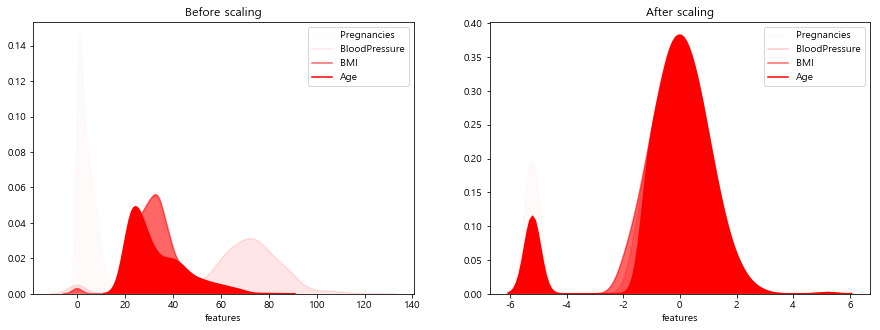

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for col, a in zip(X.columns, [0.02, 0.1, 0.6, 1]):
    sns.kdeplot(X[col], alpha=a, legend=True, ax=ax[0], shade=True, color='r')

ax[0].legend(X.columns)
ax[0].set_xlabel('features')
ax[0].set_title('Before scaling')

for col, a in zip(qtn_X.columns, [0.02, 0.2, 0.6, 1]):
    sns.kdeplot(qtn_X[col], alpha=a, legend=True, ax=ax[1], shade=True, color='r')
    
ax[1].legend(qtn_X.columns)
ax[1].set_xlabel('features')
ax[1].set_title('After scaling')

plt.show()

#### Feature scaling한 데이터로 로지스틱 회귀 분석 및 결과 비교
- 각종 방법으로 특성에 대해 변수 변환을 한 데이터와 스케일링을 하지 않은 데이터로 로지스틱 회귀 분석을 실시하고 결과를 비교해 보았다.
- 그 결과, Test F1-score를 기준으로 분류 성능을 비교할 때 균등 분포의 Quantile scaling을 한 데이터로 학습한 모델의 성능이 가장 높게 나타났다.

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

data = [X, ss_X, mm_X, rs_X, qtu_X, qtn_X]
y = diabetes['Outcome']
data_title = ['no scaling', 'StandardScaler', 'MinMaxScaler', 'RobustScaler', 'QuantileUniform', 'QuantileNormal']

scores = pd.DataFrame(index=['Train acc', 'Test acc', 'Train F1', 'Test F1'], columns=data_title)
coeffs = pd.DataFrame(index=data_title, columns=X.columns)

for df, title in zip(data, data_title):
    X_train, X_test, y_train, y_test = train_test_split(df, y, random_state=0)

    lr = LogisticRegression(max_iter=300)
    lr.fit(X_train, y_train)
    
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    
    scores.loc['Train acc', title] = accuracy_score(y_train, pred_train)
    scores.loc['Test acc', title] = accuracy_score(y_test, pred_test)
    scores.loc['Train F1', title] = f1_score(y_train, pred_train)
    scores.loc['Test F1', title] = f1_score(y_test, pred_test)
    coeffs.loc[title, :] = lr.coef_
    
scores

,no scaling,StandardScaler,MinMaxScaler,RobustScaler,QuantileUniform,QuantileNormal
Train acc,0.6875,0.689236,0.682292,0.689236,0.701389,0.680556
Test acc,0.692708,0.692708,0.682292,0.692708,0.692708,0.697917
Train F1,0.470588,0.471976,0.403909,0.471976,0.50289,0.468208
Test F1,0.40404,0.40404,0.26506,0.40404,0.427184,0.395833


- 한편, 변수 변환을 한 데이터와 하지 않은 데이터로 학습한 모델들이 얻은 회귀계수를 살펴보면 다음과 같다.
- 변수 변환을 하지 않은 데이터에 비해서, 변수 변환을 한 데이터들로 얻은 회귀계수들은 특성들의 영향력을 더 구별하기 쉽다.
- 각 회귀계수들은 BMI, Age, Pregnancies 순으로 당뇨병 여부에 영향을 미친다는 동일한 결론을 냈다.

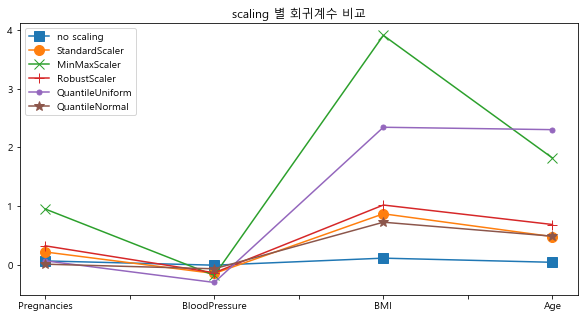

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title('scaling 별 회귀계수 비교')

for i, marker in enumerate(['s', 'o', 'x', '+', '.', '*']):
    coeffs.T.iloc[:, i].plot(ax=ax, marker=marker, ms=10)
    
ax.legend()
plt.show()

#### 로그 변환
- 로그함수는 큰 수의 범위를 압축하고 작은 수의 범위를 확장하는 기능을 한다.
- log(x)에서 x=[1, 10]의 범위를 log(x)=[0, 1] 범위로, x=[10, 100] 범위를 log(x) = [1, 2] 범위로 변환하는 것이다.
- 덕분에 두꺼운 꼬리 분포(Heavy-tailed distribution)를 가지는 양수로 된 데이터를 로그 변환으로 효과적으로 다룰수 있다.
- 이번 예제에서 사용할 'realestate'는 인도의 벵갈루루 부동산 가격과 관련된 특성들과 부동산 가격으로 구성된 회귀용 데이터이다.
- 로그 변환은 타겟 변수인 부동산 가격에 적용함으로써 타겟 스케일링을 진행한다.

In [118]:
realestate = pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/2-4_BHP.csv").dropna().reset_index(drop=True)

X = realestate[['bath', 'balcony']]
y = realestate[['price']]

realestate.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00


- 로그 변환은 NumPy 라이브러리를 통해서 간단하게 변환할 수 있다.
- 상용로그, 자연로그, 데이터가 0인 경우 음의 무한대가 되는 것을 방지하기 위해 데이터에 1을 더한 후 자연로그를 적용하는 방법, 데이터의 절댓값에 자연로그 변환을 한 후 데이터의 원래 부호를 붙이는 방법 등이 있다.

In [119]:
example_y = 39.07
print(f"원본 데이터: {example_y}")

# 상용로그
y_log = np.log10(example_y)
y_log_inv = 10**(y_log) # 변환 전 값으로 되돌리기
print(f"상용로그: {y_log} <---> {y_log_inv}")

# 자연로그
y_log2 = np.log(example_y)
y_log2_inv = np.exp(y_log2) # 변환 전 값으로 되돌리기
print(f"자연로그: {y_log2} <---> {y_log2_inv}")

# 데이터에 1을 더한(plus) 후 자연로그
y_log3 = np.log1p(example_y)
y_log3_inv = np.expm1(y_log3)
print(f"자연로그1p: {y_log3} <---> {y_log3_inv}")

# 데이터의 절대값에 자연로그 변환을 한 후 데이터의 원래 부호 붙임
y_log4 = np.sign(example_y) * np.log(np.abs(example_y))
y_log4_inv = np.sign(y_log4) * np.exp(np.abs(y_log4))
print(f"절대값 +자연로그+부호: {y_log4} <---> {y_log4_inv}")

원본 데이터: 39.07
상용로그: 1.5918434112247846 <---> 39.07000000000001
자연로그: 3.6653549090669792 <---> 39.07
자연로그1p: 3.6906279246480533 <---> 39.07000000000001
절대값 +자연로그+부호: 3.6653549090669792 <---> 39.07


#### 거듭제곱변환
- 로그 변환을 일반화한 것으로서, 분산 안정화 변환이라고도 한다.
- scikit-learn에서 제공하는 PowerTransformer를 통해 변환할 수 있으며 Box-cox 방법과 Yeo-Johnson 방법이 있다.
    - Box-cox: 주된 용도는 데이터를 정규분포에 가깝게 만들거나 데이터의 분산을 안정화 하는 것으로, 정규성을 가정하는 분석법이나 정상성을 요구하는 분석법을 사용하기에 앞서 데이터의 전처리에 사용한다. 양수인 데이터에만 적용할 수 있다.
    - Yeo-Johnson: Box-cox와 마찬가지로 데이터의 분산을 안정화하는 방법이며, Box-cox와 달리 음수를 포함하는 실수 전체에 대해 적용할 수 있다.

- PowerTransformer를 통해 타겟 데이터를 변환한 상태에서 모델을 학습하고 예측값을 얻었다면, 얻은 예측값에 inverse_transform()을 적용함으로써 원본 데이터와 동일한 스케일로 되돌릴 수 있다.

In [120]:
from sklearn.preprocessing import PowerTransformer

PTB = PowerTransformer(method='box-cox')
PTY = PowerTransformer(method='yeo-johnson')

y_ptb = pd.DataFrame(PTB.fit_transform(y), columns=y.columns)
y_pty = pd.DataFrame(PTY.fit_transform(y), columns=y.columns)
y_ptb_inv = pd.DataFrame(PTB.inverse_transform(y_ptb), columns=y.columns)

print(f"원본: {y.head(1).values}")
print(f"box-cox 변환: {y_ptb.head(1).values}")
print(f"box-cox 변환 되돌리기: {y_ptb_inv.head(1).values}")

원본: [[39.07]]
box-cox 변환: [[-1.06667465]]
box-cox 변환 되돌리기: [[39.07]]


#### Target scaling한 데이터로 시각화, 선형 회귀 분석 및 결과 비교
- 다음의 시각화 결과를 통해 타겟 스케일링 전과 스케일링(log10, log, Box-cox) 후의 차이를 볼 수 있다.
- log와 log1p, sign+abs+log의 변환 결과가 유사하고, Box-cox와 Yeo-johnson의 변환 결과가 유사하기 때문에 일부 변환 값은 시각화에서 생략하였다.

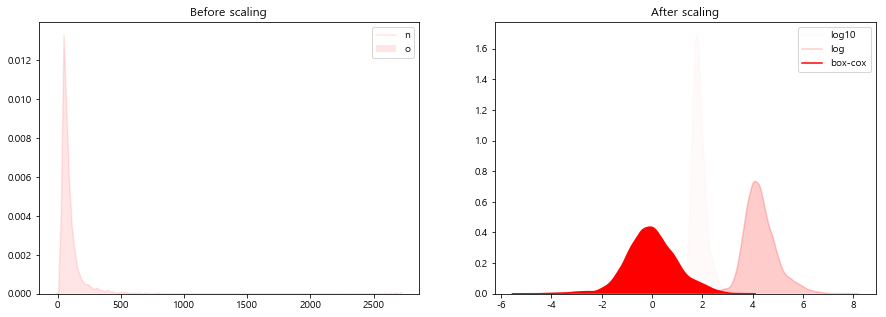

In [121]:
noscaling, log10, log, boxcox = y, np.log10(y), np.log(y), y_ptb

data = [noscaling, log10, log, boxcox]
data_title = ['no scaling', 'log10', 'log', 'box-cox']

alphas = [0.1, 0.02, 0.2, 1]
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

for i, df, a in zip(range(len(data)), data, alphas):
    if i==0:
        sns.kdeplot(df['price'], ax=ax[0], alpha=a, shade=True, color='red')
        ax[0].legend(data_title[0])
        ax[0].set_title('Before scaling')
    else:
        sns.kdeplot(df['price'], ax=ax[1], alpha=a, shade=True, color='red')
        ax[1].legend(data_title[1:])
        ax[1].set_title('After scaling')
        
plt.show()

- 각기 다르게 타겟 스케일링한 데이터로 학습한 선형 회귀 모델들의 성능을 비교해 보면, Test $R^2$ 기준으로 원본 데이터에 비해 스케일링한 데이터들의 결정계수 값이 더 높은 것을 확인할 수 있다.

In [122]:
# Target scaling한 데이터로 선형 회귀 분석한 결과 비교
noscaling, log10, log, log1p, sblog, bc, yj = y, np.log10(y), np.log(y), np.log1p(y), np.sign(y)*np.log(np.abs(y)), y_ptb, y_pty

data = [noscaling, log10, log, log1p, sblog, bc, yj]
data_title = ['no scaling', 'log10', 'log', 'log1p', 'sign+abs+log', 'box-cox', 'yeo-johnson']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

scores = pd.DataFrame(index=['Train R2', 'Test R2'], columns=data_title)
for df, title in zip(data, data_title):
    X_train, X_test, y_train, y_test = train_test_split(X, df, random_state=0)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    scores.loc['Train R2', title] = lr.score(X_train, y_train)
    scores.loc['Test R2', title] = lr.score(X_test, y_test)
    
scores

,no scaling,log10,log,log1p,sign+abs+log,box-cox,yeo-johnson
Train R2,0.354048,0.548043,0.548043,0.548732,0.548043,0.521241,0.521324
Test R2,0.352965,0.547998,0.547998,0.548598,0.547998,0.524295,0.524158


#### 순위로 변환
- 수치형 변수를 순위로 변환하는 방법이다.
- 데이터를 순위로 변환한 후 순위를 전체 데이터의 개수로 나누면 모든 데이터 값이 0부터 1의 범위에 들어가기 때문에 다루기 쉬워진다.
- 다만, 이 방법으로 데이터를 변환하면 수치의 크기나 간격 정보는 소실된다.
- 이 방법은 Pandas의 데이터프레임 객체에 .rank()를 적용함으로써 간단하게 구현할 수 있다.
- 기본적으로 ascending=True로 되어있기 때문에 오름차순으로 순위를 매겨서 값이 클수록 순위값이 크다.
- 가장 큰 값이 1위가 되도록 하려면 ascending=False를 설정함으로써 역순으로 순위를 매기면 된다.
- 값이 동일한 데이터 포인트들은 그들의 평균 순위로 동일한 순위 값을 갖게 된다.

In [123]:
print(f"[Before] feature별 데이터 분포 확인:")
print(X.describe().loc[['mean', 'std', 'max', 'min'], :], '\n')

rank_X = X.rank(ascending=False)
print(f"[After] feature별 데이터 분포 확인:")
print(rank_X.describe().loc[['mean', 'std', 'max', 'min'], :],)

[Before] feature별 데이터 분포 확인:
          bath   balcony
mean  2.458378  1.629936
std   0.881128  0.780127
max   9.000000  3.000000
min   1.000000  0.000000 

[After] feature별 데이터 분포 확인:
             bath     balcony
mean  3748.500000  3748.50000
std   1926.118911  2010.62683
max   7282.500000  7295.50000
min      2.000000   503.00000


#### 구간 분할(Binning)
- 수치형 변수를 구간 별로 나누어 범주형 변수로 변환하는 방법이다.
- 구간 분할을 하면 순서가 있는 범주형 변수가 되므로 순서를 수치화해 사용하거나, 범주형 변수로서 원핫 인코딩 등을 적용할 수도 있다.
- 구간 분할 방법으로는 같은 간격으로 분할하는 방법, 구간을 지정하여 분할하는 방법 등이 있다.
- Pandas의 cut이나 scikit-learn의 KBinsDiscretizer를 사용하여 간단히 구간 분할 할 수 있다.
    - cut: bins 파라미터에 bin 수를 지정하거나 bin의 범위를 지정하여 구간 분할 한다.
    - KBinsDiscretizer: n_bins 파라미터에 구간의 수를 지정하여, 각 구간을 하나의 특성으로 삼는 원핫 인코딩을 적용한다. 해당 데이터 행이 특정 구간에 속하는 경우 나머지 열은 0, 속하는 열은 1로 표시하는 희소 행렬을 반환한다.

In [124]:
# pd.cut으로 구간분할
binned = pd.cut(X['bath'], 4) # bin 수 지정

freq_df = pd.DataFrame(binned.value_counts()).reset_index().rename(columns={'index':'계급', 'bath':'빈도'}).sort_values(by='계급', ascending=True)
print("bin수 지정:\n", freq_df, '\n')

bin_edges = [0, 2, 4, 6, float('inf')]

# right=False: 0이상~2미만, 2이상~4미만, 4이상~6미만, 6이상~
binned2 = pd.cut(X['bath'], bin_edges, right=False) # bin의 범위 지정
freq_df2 = pd.DataFrame(binned2.value_counts()).reset_index().rename(columns={'index':'계급', 'bath':'빈도'}).sort_values(by='계급', ascending=True)

print("bin범위 지정:\n", freq_df2, '\n')

bin수 지정:
              계급    빈도
0  (0.992, 3.0]  6774
1    (3.0, 5.0]   642
2    (5.0, 7.0]    77
3    (7.0, 9.0]     3 

bin범위 지정:
            계급    빈도
2  [0.0, 2.0)   428
0  [2.0, 4.0)  6346
1  [4.0, 6.0)   642
3  [6.0, inf)    80 



In [125]:
# sklearn.preprocessing.KBinsDiscretizer로 구간 분할
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=3, strategy='quantile')
kb.fit(np.array(X['bath']).reshape(-1, 1)) # reshape 필요
print(f"bin edges: {kb.bin_edges_[0]}") # 3개의 bin 구간이 생김

kbbin = kb.bin_edges_[0]
bin_edges = [] # 구간 리스트인 bin_edges를 만듬
for i in range(len(kbbin)):
    if len(kbbin)-1 != i:
        tup = (int(kbbin[i]), int(kbbin[i+1]))
        bin_edges.append(tup)
        
kbbined = kb.transform(np.array(X['bath']).reshape(-1, 1))
result = pd.DataFrame(kbbined.toarray(), columns=bin_edges)
result.head(3)

bin edges: [1. 2. 3. 9.]


,"(1, 2)","(2, 3)","(3, 9)"
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0


### 2-4-2. 범주형 변수 변환
- 범주형 변수 변환 방법에는 원-핫인코딩(One-hot-encoding), 더미코딩(Dummy coding), 숫자로 표현된 범주형 특성 변환, 레이블 인코딩(Label encoding, Ordinal encoding), 특징 해싱(Feature hashing), 빈도 인코딩(Frequency encoding) 등이 있다.
- 예제는 앞서 사용한 'realestate'를 계속해서 사용한다.

In [126]:
realestate = pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/2-4_BHP.csv").dropna().reset_index(drop=True)
realestate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7496 entries, 0 to 7495
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     7496 non-null   object 
 1   availability  7496 non-null   object 
 2   location      7496 non-null   object 
 3   size          7496 non-null   object 
 4   society       7496 non-null   object 
 5   total_sqft    7496 non-null   object 
 6   bath          7496 non-null   float64
 7   balcony       7496 non-null   float64
 8   price         7496 non-null   float64
dtypes: float64(3), object(6)
memory usage: 527.2+ KB


In [127]:
print("범주형 변수 기술 통계:")
realestate.describe(include='object')

범주형 변수 기술 통계:


,area_type,availability,location,size,society,total_sqft
count,7496,7496,7496,7496,7496,7496
unique,4,74,634,15,2592,1682
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,6017,5709,397,3411,80,172


#### 원-핫 인코딩 (One-hot encoding)
- 범주형 변수의 모든 수준(Level)들을 각각 새로운 특성으로 삼아서 0 또는 1의 값을 가지도록 데이터를 변환하는 것이다.
- 통계학의 더미코딩(Dummy coding)과 유사하지만, 더미코딩은 모든 수준 중에서 한 가지 수준은 제외하고 나머지 수준들로 새로운 특성을 삼는다는 점에서 차이가 있다.
- 다음은 데이터의 변수들 중에서도 area_type 특성의 데이터를 원-핫 인코딩한 결과이다.
- 원본 데이터의 area_type과 일치하는 컬럼의 데이터가 1로 표시되고 나머지 컬럼들은 0으로 표시된다.

In [128]:
# 원본 데이터
print("범주형 변수의 수준 개수: ", realestate[['area_type']].nunique())
realestate[['area_type']].head()

범주형 변수의 수준 개수:  area_type    4
dtype: int64


,area_type
0,Super built-up Area
1,Plot Area
2,Super built-up Area
3,Super built-up Area
4,Plot Area


In [129]:
# 원-핫 인코딩한 데이터
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

result = pd.DataFrame(ohe.fit_transform(realestate[['area_type']]).toarray(), columns=ohe.get_feature_names())
print("원-핫 인코딩 결과 feature의 개수: ", result.shape[1])
result.head()

원-핫 인코딩 결과 feature의 개수:  4


,x0_Built-up Area,x0_Carpet Area,x0_Plot Area,x0_Super built-up Area
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0


#### 더미코딩 (Dummy coding)
- 범주형 변수의 수준이 n개일 때 가변수를 n개 만들어버리면 다중 공선성이 생기므로 이를 방지하기 위해 n-1개의 가변수를 만드는 방법이다.
- Pandas의 get_dummies를 사용하고, 파라미터를 drop_first=True로 설정함으로써 간단하게 더미코딩 할 수 있다.
- 범주형 변수의 수준의 개수가 너무 많을 경우, 특징의 개수도 덩달아 증가하기 때문에 정보가 적은 특징이 대량 생산될 수 있다.
- 이 경우 학습 시간이나 메모리가 급증할 수 있으므로, 범주형 변수의 수준이 너무 많을 때는 다른 인코딩 방법을 검토하거나, 범주형 변수의 수준의 개수를 줄이는 방법을 생각해볼 수 있다.

In [130]:
# 원본 데이터
print("범주형 변수의 수준 개수: ", realestate[['area_type']].nunique())
realestate[['area_type']].head()

범주형 변수의 수준 개수:  area_type    4
dtype: int64


,area_type
0,Super built-up Area
1,Plot Area
2,Super built-up Area
3,Super built-up Area
4,Plot Area


In [131]:
# 더미코딩한 데이터
result2 = pd.get_dummies(realestate[['area_type']], drop_first=True)
print("더미코딩 결과 feature의 개수: ", result2.shape[1])
result2.head()

더미코딩 결과 feature의 개수:  3


,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0


#### 숫자로 표현된 범주형 특성 변환
- 숫자로 기재된 범주형 변수의 경우, 데이터를 불러오면 일반적으로 수치형 변수로 인식한다.
- 하지만 명목척도인 변수임에도 불구하고 데이터 작성 규칙에 따라 단순히 숫자로 입력되어 있는 경우라면, 이 변수는 연속형 변수로 다루면 안된다.
- 이러한 변수들을 범주형 변수로 다루기 위해서는 해당 특성의 데이터 타입을 범주형으로 변경하는 방법을 사용할 수 있다.

In [132]:
realestate.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [133]:
# area_type의 데이터값이 숫자로 되어있다고 가정
realestate['area_type'] = realestate['area_type'].map({
    'Super built-up  Area' : 0,
    'Plot  Area' : 1,
    'Built-up  Area' : 2,
    'Carpet  Area' : 3
})

print(realestate.info())
realestate[['area_type']].describe(include='all') # area_type의 0, 1, 2, 3은 서열의 의미가 없는데 수치형 변수로 해석된다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7496 entries, 0 to 7495
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     7496 non-null   int64  
 1   availability  7496 non-null   object 
 2   location      7496 non-null   object 
 3   size          7496 non-null   object 
 4   society       7496 non-null   object 
 5   total_sqft    7496 non-null   object 
 6   bath          7496 non-null   float64
 7   balcony       7496 non-null   float64
 8   price         7496 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 527.2+ KB
None


,area_type
count,7496.000000
mean,0.365662
std,0.763294
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


In [134]:
# 데이터 타입을 category로 변경: 수치형이지만 범주형 변수로 해석된다.
realestate['area_type'] = realestate['area_type'].astype('category')
realestate[['area_type']].describe(include='all')

,area_type
count,7496
unique,4
top,0
freq,6017


#### 레이블 인코딩
- 15개의 수준이 있는 범주형 변수는 레이블 인코딩(Label encoding)을 통해 각 수준을 0~14까지의 수치로 라벨링하게 된다.
- 레이블 인코딩은 Pandas 시리즈에 replace 혹은 map을 적용하거나 scikit-learn의 LabelEncoder를 활용할 수 있다.
- 범주형 변수가 서열척도라면 순서의 정보를 가지는 수치형 레이블을 그대로 사용할 수 있지만, 명목척도라면 각 수준의 레이블의 수치는 의미가 없다.
- 따라서 이런 경우에는 처음부터 원-핫 인코딩이나 더미코딩과 같은 변수 변환을 하는 것이 낫다.

- 다음 예제에서는 15개의 수준을 가지고 있는 size 변수를 부동산의 크기에 대응하도록 레이블 인코딩하였다.
- 직접 범주들의 값을 확인하여 부동산 사이즈가 가장 작은 '1RK'부터 가장 큰 '11BHK'까지 0에서 15로 각각 인코딩한 것이다.
- scikit-learn의 경우, 범주명을 오름차순으로 정렬하여 자동으로 레이블의 수치를 매기기 때문에 수준의 서열과 대응하고 있는지 classes_로 확인이 필요하다.

In [135]:
# 변수 'size'의 수준들을 확인: B(Bedroom), H(Hall), K(Kitchen), R(Room)을 의미
print(sorted(realestate['size'].unique()))
print(realestate[['size']].head())

['1 BHK', '1 RK', '11 BHK', '2 BHK', '2 Bedroom', '3 BHK', '3 Bedroom', '4 BHK', '4 Bedroom', '5 BHK', '5 Bedroom', '6 BHK', '6 Bedroom', '7 BHK', '9 BHK']
        size
0      2 BHK
1  4 Bedroom
2      3 BHK
3      2 BHK
4  4 Bedroom


In [136]:
# Pandas의 Series에 .replace() 혹은 .map()을 사용
case1 = realestate['size'].replace({'1 RK':0, '1 BHK':1, '2 Bedroom':2, '2 BHK':3, '3 Bedroom':4, '3 BHK':5, '4 Bedroom':6, '4 BHK':7,  '5 Bedroom':8, '5 BHK':9, '6 Bedroom':10, '6 BHK':11,  '7 BHK':12, '9 BHK':13, '11 BHK':14})
print(case1.values[:5])

[3 6 5 3 6]


In [137]:
# sklearn의 LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
case2 = le.fit_transform(realestate['size'])
print(case2[:5])
print(le.classes_)

[3 8 5 3 8]
['1 BHK' '1 RK' '11 BHK' '2 BHK' '2 Bedroom' '3 BHK' '3 Bedroom' '4 BHK'
 '4 Bedroom' '5 BHK' '5 Bedroom' '6 BHK' '6 Bedroom' '7 BHK' '9 BHK']


#### 특징 해싱(Feature hashing)
- 범주의 수준이 많은 변수를 원-핫인코딩이나 더미 코딩으로 데이터를 변환하게 되면 너무 많은 특징을 갖게 된다.
- 특징 해싱은 늘어날 특징의 개수를 한정하면서 변수 변환을 하는 방법이다. Hasing trick이라고도 한다.
- 특징 해싱은 변환 후의 특징의 개수를 사전에 정하고, 해시 함수를 이용하여 수준별로 1로 표시할 위치를 결정한다.
- 원-핫 인코딩에서는 수준마다 서로 다른 위치에 1을 표시하지만, 특징 해싱에서는 해시 함수에 따른 계산에 의해 다른 수준에서도 같은 위치에 1을 표시할 수 있다. 결과는 희소행렬로 반환된다.
- 모델 학습 비용을 줄이고, 회귀 범주 처리를 쉽게 한다는 장점이 있다.
- 반면, 선형 또는 커널 모델에만 적합하고 해시된 특징은 해석이 불가하다는 단점이 있다.
- 변수 size에 특징 해싱을 하게되면 15개의 범주를 5개의 특징으로 변환할 수 있다.

In [138]:
from sklearn.feature_extraction import FeatureHasher

fh = FeatureHasher(n_features=5, input_type='string') # 변환 후 특징 개수 5개
hash_df = fh.transform(realestate['size'].values)
hash_df = pd.DataFrame(hash_df.todense(), columns=[f'feature_{i}' for i in range(5)])
print(hash_df.value_counts())
print(realestate['size'].value_counts())

feature_0  feature_1  feature_2  feature_3  feature_4
-1.0       1.0         0.0       0.0        1.0          3412
 0.0       0.0         0.0       0.0        1.0          3024
-1.0       0.0        -1.0       0.0        1.0           700
 1.0       1.0        -1.0       2.0        2.0           193
 2.0       1.0         0.0       2.0        2.0           139
 1.0       2.0         0.0       2.0        2.0            16
-1.0       0.0         0.0       0.0        1.0            10
                                 1.0        1.0             1
                      -2.0       0.0        1.0             1
dtype: int64
2 BHK        3411
3 BHK        3012
1 BHK         353
4 BHK         347
4 Bedroom     193
3 Bedroom     120
2 Bedroom      16
5 Bedroom      16
1 RK           10
5 BHK           9
6 BHK           3
6 Bedroom       3
11 BHK          1
9 BHK           1
7 BHK           1
Name: size, dtype: int64


#### 빈도 인코딩(Frequency encoding)
- 각 수준의 빈도로 범주형 변수를 대체하는 방법이다.
- 각 수준의 출현 빈도와 타겟변수 간에 관련성이 있을 때 유효하다.
- 동일한 값이 발생할 수 있으니 주의해야 하며, 학습 데이터와 검증용 데이터에 대해 동일한 기준으로 빈도 인코딩해야 한다.

In [139]:
# 반복문으로 value_counts, map을 사용하여 빈도 인코딩
fe = realestate[['availability', 'society', 'total_sqft']]
for col in ['availability', 'society', 'total_sqft']:
    freq = fe[col].value_counts()
    fe[col] = fe[col].map(freq)
    
fe.head()

,availability,society,total_sqft
0,157,5,11
1,5709,11,10
2,5709,22,4
3,5709,1,27
4,5709,6,1


In [140]:
realestate[['availability', 'society', 'total_sqft']].head()

,availability,society,total_sqft
0,19-Dec,Coomee,1056
1,Ready To Move,Theanmp,2600
2,Ready To Move,Soiewre,1521
3,Ready To Move,DuenaTa,1170
4,Ready To Move,Prrry M,2785


In [141]:
# availability 변수의 수준별 빈도 확인: 19-Dec(157건), Ready To Move(5709건)
realestate['availability'].value_counts()

Ready To Move    5709
18-Dec            180
18-May            171
19-Dec            157
18-Apr            148
                 ... 
15-Dec              1
17-Feb              1
17-Jan              1
14-Jul              1
16-Jan              1
Name: availability, Length: 74, dtype: int64

## 연습문제

#### 1.
- 다음은 포르투갈 은행의 정기예금 프로모션 전화 데이터이다.
- 데이터는 고객의 특징을 나타내는 입력 변수들과 고객이 정기예금에 가입했는지 여부를 나타내는 출력 변수로 구성되어 있다.
- 데이터 컬럼 정의서는 아래와 같다.
- 시각화 방법을 포함하여 다음 데이터의 결측치와 이상치를 확인하고 합리적인 전처리를 진행하시오.

|변수명|설명|
|-|-|
|age|나이|
|job|직업의 형태|
|martial|결혼 상태|
|education|학력|
|default|신용 불이행 여부|
|balance|은행 잔고|
|housing|부동산 대출 여부|
|loan|개인 대출 여부|
|contact|연락 수단|
|month|마지막으로 연락한 달|
|y|고객이 정기예금에 가입했는지 여부|

In [142]:
df = pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice1_bank.csv")
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,month,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,apr,no


In [143]:
# 해당 데이터에는 결측치가 없다.
print(df.isna().sum(), "\n")

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
month        0
y            0
dtype: int64 



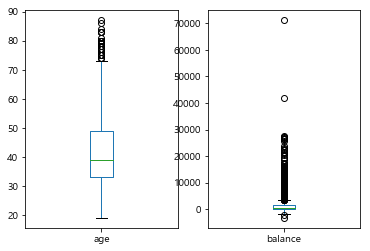

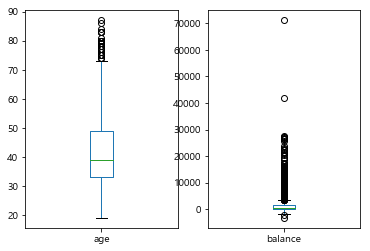

In [144]:
# 전체 데이터 중, 수치형 변수인 age와 balance에서 이상치가 발견되었다.
# 다만, age의 경우, 이상치가 합리적인 수준의 데이터라고 판단되어 이상치 처리를 하지 않기로 결정하였다.
# balance의 경우 이상치가 전체 데이터 대비 극단적이라고 생각하여 데이터의 소실이 없는 조정을 적용하기로 결정하였다. 
df.plot(kind='box', subplots=True)
plt.show()
df.plot(kind='box', subplots=True)
plt.show()

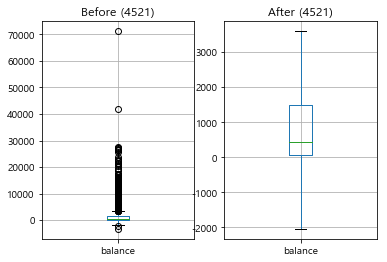

In [145]:
# 이상치 찾기
IQR = df['balance'].quantile(0.75) - df['balance'].quantile(0.25)
top = df['balance'].quantile(0.75) + IQR * 1.5
down = df['balance'].quantile(0.25) - IQR * 1.5
df2 = df.copy()
df2['balance'] = df['balance'].clip(down, top)

# 이상치 조정 전후 시각화 결과, 다음과 같이 이상치가 사라진 것을 확인할 수 있다.
fig, axes = plt.subplots(1,2)
for data, ax, title in zip([df, df2], axes, ['Before', 'After']):
    data[['balance']].boxplot(ax=ax)
    ax.set_title("{} ({})".format(title, len(data)))
plt.show()

#### 2.
- 해당 데이터에 있는 범주형 변수를 전처리 하는 방법을 2가지 이상 설명하고, 각 범주형 변수에 대한 적절한 전처리를 진행하시오.

In [146]:
# age와 balance를 제외한 나머지 변수들은 모두 범주형 변수이다.
# 범주형 변수를 전처리하는 방법으로는 원핫인코딩, 더미코딩, 레이블 인코딩, 특징 해싱 등이 있다.
# 그 중에서도 더미코딩은 범주형 변수의 수준이 n개일 때 가변수 n-1개를 생성함으로써 다중공선성을 방지하는 변수변환 방법이다.
# 레이블 인코딩은 문자열인 수준들을 숫자로 맵핑하는 변수변환 방법이다. 
# 아래에서 이진변수와 서열척도인 범주형 변수의 경우, 레이블 인코딩을 진행하고, 명목척도인 범주형 변수의 경우 더미코딩을 하기로 한다.

df3 = df2.copy()
# 이진변수 레이블 인코딩
for col in ['default', 'housing', 'loan', 'y']:
    df3[col] = df3[col].map({'yes':1, 'no':0})

# 서열척도 변수 레이블 인코딩
df3['education'] = df3['education'].map({'primary':1, 'secondary':2, 'tertiary':3, 'unknown':0})

# 명목척도 더미코딩
df3 = pd.get_dummies(df3, columns=['marital', 'job', 'contact', 'month'])
print(df3.head(3))

   age  education  default  balance  housing  loan  y  marital_divorced  \
0   30          1        0   1787.0        0     0  0                 0   
1   33          2        0   3596.5        1     1  0                 0   
2   35          3        0   1350.0        1     0  0                 0   

   marital_married  marital_single  ...  month_dec  month_feb  month_jan  \
0                1               0  ...          0          0          0   
1                1               0  ...          0          0          0   
2                0               1  ...          0          0          0   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  month_sep  
0          0          0          0          0          0          1          0  
1          0          0          0          1          0          0          0  
2          0          0          0          0          0          0          0  

[3 rows x 37 columns]


#### 3.
- 해당 데이터에 있는 수치형 변수를 전처리 하는 방법을 2가지 이상 설명하고, 각 수치형 변수에 대한 적절한 전처리를 진행하시오.

In [147]:
# age와 balance는 수치형 변수인데 이 변수들의 단위는 차이가 크다.
# 모델을 학습할 때 값의 범위가 큰 특성이거나, 특성 간에 척도가 크게 다를 경우 회귀계수가 왜곡되거나
# 학습이 제대로 이루어지지 않을 수 있기 때문에 변수 변환이 필요하다.
# 일반적으로 feature scaling에 사용하는 방법으로 표준화(standardization)와 최소최대 스케일링(Min-max scaling)이 있다.
# 표준화를 통해 각 특성들은 0에 가까운 평균을 가지게 되며, 대등하게 비교할 수 있는 스케일을 갖게 된다.
# 반면, 여전히 이상치의 영향을 받으며, 최솟값과 최댓값의 크기를 제한하지 않기 때문에 특성의 범위가 여전히 클 수 있다는 단점이 있다.
# 최소최대 스케일링은 모든 특성이 정확하게 0과 1 사이에 위치하도록 데이터를 변경하기 때문에
# 이미지 데이터의 픽셀값과 같이 처음부터 범위가 정해진 변수는 최소최대 스케일링을 이용하면 자연스럽다.
# 반면, 변환후 평균이 정확히 0이되지 않고 이상치의 영향을 받기 쉽다는 단점이 있다.

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled = ss.fit_transform(df3[['age', 'balance']])
df3[['age', 'balance']] = scaled
print(df3[['age', 'balance']].head(3))

        age   balance
0 -1.056270  0.655937
1 -0.772583  2.114953
2 -0.583458  0.303580


#### 4.
- 해당 데이터에 클래스 불균형이 있는지 확인하고, 그렇게 생각한 이유를 작성하시오.

In [148]:
# 해당 데이터는 불균형이라고 할 수 있다.
# 데이터 불균형이란 타겟변수의 클래스 수가 불균형한 데이터 상황을 뜻하는데,
# 본 데이터의 타겟변수인 y의 클래스 비율을 살펴보면 아래와 같이 88% : 12%로 차이가 많이 나기 때문이다.

table = pd.DataFrame(df3['y'].value_counts())
table['%'] = df3['y'].value_counts(normalize=True)
print(table.round(2))

      y     %
0  4000  0.88
1   521  0.12


#### 5.
- 클래스 불균형이 있는 데이터를 처리하는 방법들 중 2가지를 들어 그 방법의 장단점을 서술하고, 그 중 하나를 선택하여 전처리를 진행하시오.

In [149]:
# 불균형 데이터를 처리하기 위한 방법으로는 오버샘플링과 언더샘플링이 있는데,
# 본 데이터와 같이 데이터 크기가 비교적 작은 경우에는 오버샘플링을 진행한다.
# 오버샘플링 방법들에는 랜덤오버샘플링, SMOTE, Borderline SMOTE, K-means SMOTE, SVM SMOTE, ADASYN이 있다.
# 랜덤오버샘플링은 기존에 존재하는 소수의 클래스를 단순 복제하여 클래스가 불균형 하지 않도록 비율을 맞춰주는 방법이다.
# 분포의 변화는 없으나 소수 클래스의 숫자가 늘어나기 때문에 더 많은 가중치를 받게 되어 유효하다고 본다.
# 예측변수가 질적변수이거나 결측치가 있어도 전처리가 필요없다. 반면, 과적합의 위험이 있다.
# SVM SMOTE는 SVM 알고리즘으로 데이터를 학습함으로써 생성되는 support vector 데이터들 중에서 소수 클래스 데이터들을 경계 데이터로 삼아
# SMOTE를 적용하는 방법이다. 이 때문에 support vector로서 유효한 소수 클래스 데이터들이 오버샘플링된다는 장점을 가진다.
# 반면, 데이터를 학습해서 생성해야 하기 때문에 랜덤오버샘플링보다는 시간이 좀 더 걸릴 수 있고,
# 예측변수들의 값이 모두 수치형이어야 하고, 결측값이 없어야한다는 단점이 있다.

from imblearn.over_sampling import RandomOverSampler, SVMSMOTE
X = df3.drop('y', axis=1)
y = df3[['y']]
os = SVMSMOTE()
balX, baly = os.fit_resample(X, y)
print('랜덤오버샘플링 결과')
print(pd.DataFrame(baly).value_counts(), "\n")
# 앞서 불균형이었던 타겟변수의 클래스가 동일하게 오버샘플링된 것을 확인할 수 있다.

랜덤오버샘플링 결과
1    4000
0    4000
dtype: int64 

